This code uses $\texttt{Polytope}$ package from here:  https://tulip-control.github.io/polytope/ 


In [2]:
# !pip install polytope

import polytope as pt
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

## **Polytope definition and plot**

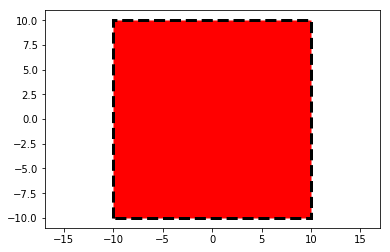

In [3]:
%matplotlib inline

A = np.array([[1, 0],
              [0, 1],
              [0, -1],
              [-1, 0]])

b = np.array([[10],
              [10],
              [10],
              [10]])


P = pt.Polytope(A, b)
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [20, 20]
P.plot(ax, color='r')
ax.autoscale_view()
ax.axis('equal')
plt.show()


## **Polytope reduction**

Single polytope 
  [[ 1.  0.] |    [[10.]
   [ 0.  1.] x <=  [10.]
   [ 0. -1.] |     [10.]
   [-1.  0.]]|     [10.]]

-------reduced polytope----
Single polytope 
  [[ 1.  0.] |    [[10.]
   [ 0.  1.] x <=  [10.]
   [ 0. -1.] |     [10.]
   [-1.  0.]]|     [10.]]



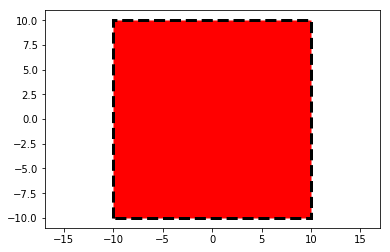

In [4]:
%matplotlib inline

A = np.array([[1, 0],
              [0, 1],
              [0, -1],
              [-1, 0],
              [1,1]])

b = np.array([[10],
              [10],
              [10],
              [10],
              [100]])
print(P)
P=pt.reduce(P)

print('-------reduced polytope----')
print(P)
P = pt.Polytope(A, b)
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [20, 20]
P.plot(ax, color='r')
ax.autoscale_view()
ax.axis('equal')
plt.show()

## **Toolbox handles Polystope not Polyhedra**

In [5]:
%matplotlib inline

A = np.array([[1, 0],
              [0, 1],
              [0, -1]])

b = np.array([[10],
              [10],
              [10]])

try:
    P = pt.Polytope(A, b)
    # fig, ax = plt.subplots(1,1)
    plt.rcParams['figure.figsize'] = [20, 20]
    P.plot(ax, color='r')
    ax.autoscale_view()
    ax.axis('equal')
    plt.show()
except:
    print('something is wrong with Polytope')
else:
    print('polytope has nothing wrong')

something is wrong with Polytope


## **Polytope V-representation and conversion H to V, V to H**


Single polytope 
  [[ 0.  1.] |    [[10.]
   [-1. -0.] x <=  [10.]
   [ 1.  0.] |     [10.]
   [ 0. -1.]]|     [10.]]



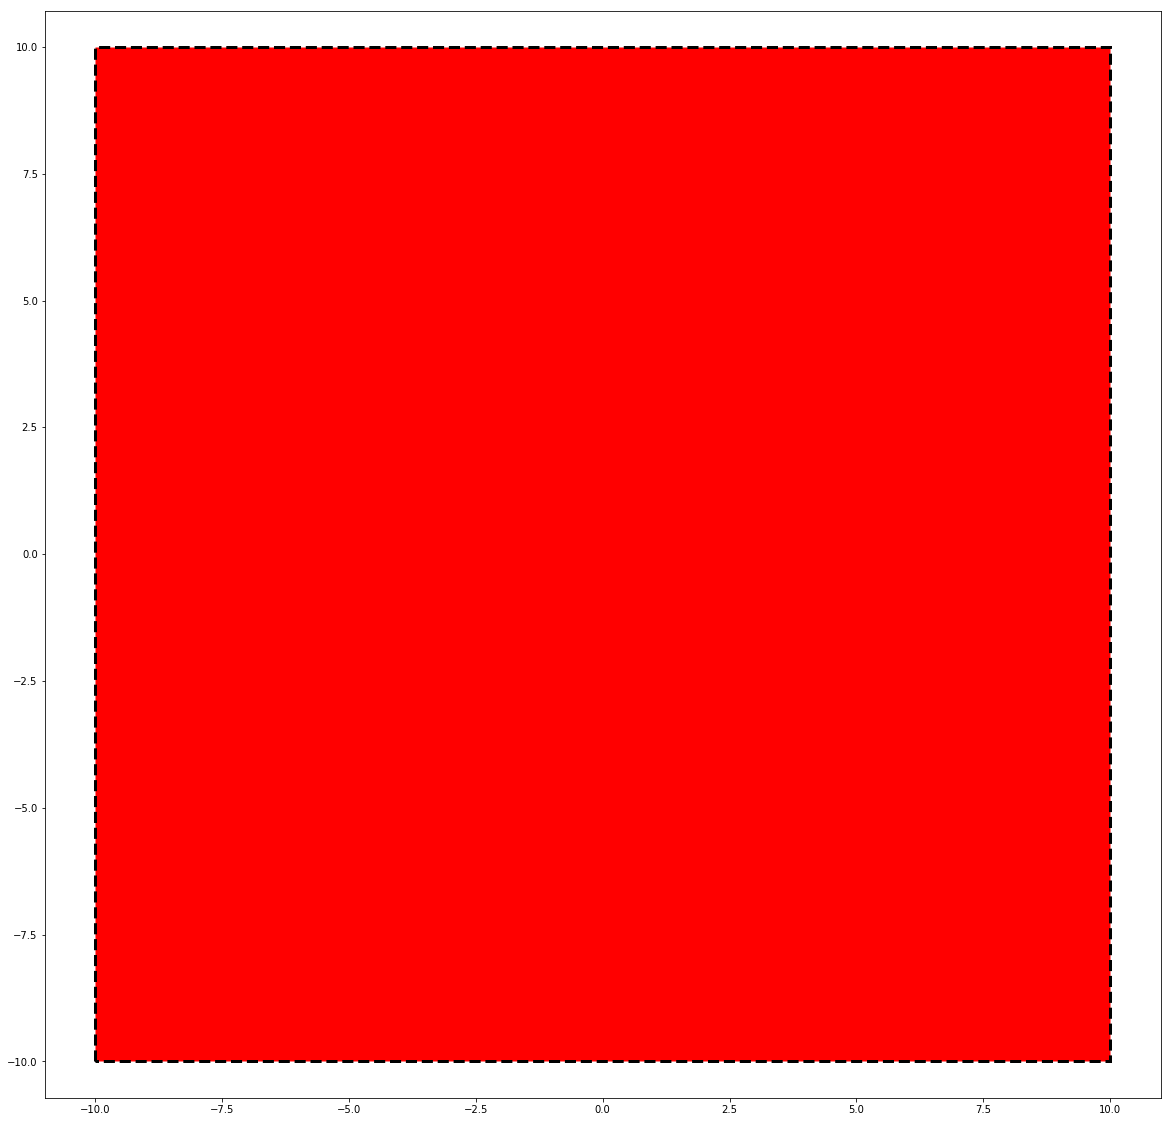

[[-10. -10.]
 [-10.  10.]
 [ 10. -10.]
 [ 10.  10.]]


In [6]:
V=[[10,10],[-10,10],[10,-10],[-10,-10]]
P=pt.qhull(np.asarray(V))
print(P)

fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [1,1]
P.plot(ax, color='r')
ax.axis('equal')
plt.show()

V1 = pt.extreme(P)
print(V1)

## **Minkwosky sum of two Polytopes and Projection** 

Text(0.5,1,'the minkowski_sum plot')

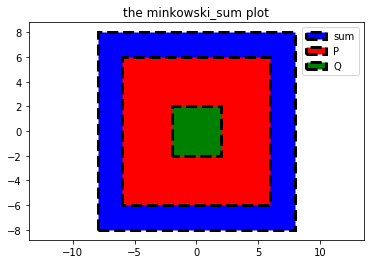

In [7]:
# Figure 4.11 MPC book 
%matplotlib inline

def minkowski_sum(X, Y):

    # Minkowski sum between two polytopes based on 
    # vertex enumeration. So, it's not fast for the
    # high dimensional polytopes with lots of vertices.
    V_sum = []
    if isinstance(X, pt.Polytope):
        V1 = pt.extreme(X)
    else:
        V1 = X
        
    if isinstance(Y, pt.Polytope):
        V2 = pt.extreme(Y)
    else:
        V2 = Y

    for i in range(V1.shape[0]):
        for j in range(V2.shape[0]):
            V_sum.append(V1[i,:] + V2[j,:])
                    
    return pt.qhull(np.asarray(V_sum))


def projection(X, nx):
    '''
    the example of simple projection, just extract the number in the axis
    '''
    V_sum = []
    V = pt.extreme(X)
    for i in range(V.shape[0]):
          V_sum.append(V1[i,1:n])
    return pt.qhull(np.asarray(V_sum))
   

P = np.array([[1, 0],
              [0, 1],
              [0, -1],
              [-1, 0]])

p = np.array([[6],
              [6],
              [6],
              [6]])

Q = np.array([[1, 0],
              [0, 1],
              [0, -1],
              [-1, 0]])

q = np.array([[2],
              [2],
              [2],
              [2]])

Pp = pt.Polytope(P, p)
Qq = pt.Polytope(Q, q)

p_sum  = minkowski_sum(Pp, Qq)

fig, ax = plt.subplots(1,1)
p_sum.plot(ax, color='b')
Pp.plot(ax, color='r')
Qq.plot(ax, color='g')
ax.legend(['sum', 'P', 'Q'])
ax.autoscale_view()
ax.axis('equal')
plt.title('the minkowski_sum plot')

Single polytope 
  [[-1.  0.] |    [[6.]
   [ 0.  1.] x <=  [3.]
   [ 0. -1.] |     [3.]
   [ 1.  0.]]|     [6.]]



(-6.600000000000001, 6.6, -3.3, 3.3000000000000007)

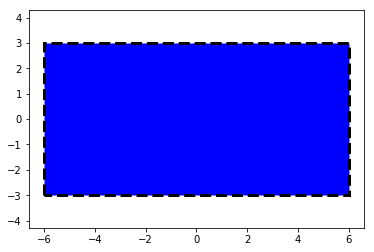

In [8]:
%matplotlib inline

def projection(X, nx):
    V_sum = []
    V = pt.extreme(X)
    for i in range(V.shape[0]):
          V_sum.append(V[i,0:nx])
    return pt.qhull(np.asarray(V_sum))
   

P = np.array([[1, 0, 0],
              [0, 1, 0 ],
              [0, -1, 0 ],
              [-1, 0, 0],
              [0,0,1],
              [0,0,-1]])

p = np.array([[6],
              [3],
              [3],
              [6],
              [10],
              [10]])

Pp = pt.Polytope(P, p)

PProj  = projection(Pp,2 )
print(PProj)

fig, ax = plt.subplots(1,1)
PProj.plot(ax, color='b')
ax.autoscale_view()
ax.axis('equal')

## **N-Steps Controlable sets to a given Set** ##

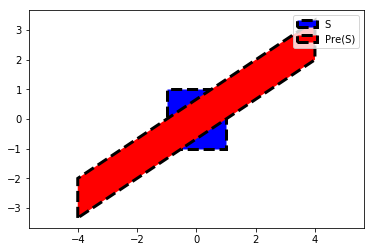

In [9]:
def precursor(Xset, A, Uset=pt.Polytope(), B=np.array([]), Wset=pt.Polytope()):
    '''
    Xset: the origin set 
    A: A matrix of the dynamic sys 
    B: B matrix of the dynamic sys 
    Uset: the U constraint region
    Wset: don't understand 
    return: the previous step from Xset based on the dynamic equation 

    '''
    if not B.any():
        if not pt.is_empty(Wset):
            return pt.Polytope( pontryagin_diff(Xset, Wset).A @ A, Xset.b)
        else:
            return pt.Polytope(Xset.A @ A, Xset.b)
        
    if not pt.is_empty(Wset):
        tmp  = minkowski_sum( pontryagin_diff(Xset, Wset), pt.extreme(Uset) @ -B.T )
        return pt.Polytope(tmp.A @ A, tmp.b)
    else:
        tmp  = minkowski_sum( Xset, pt.extreme(Uset) @ -B.T )
        return pt.Polytope(tmp.A @ A, tmp.b)

# Example on step 
A = np.array([[1.5, 0],
              [1.0, -1.5]])

B = np.array([[1.0], 
              [0.0]])
S = pt.Polytope(np.array([[1.0, 0], 
                          [0, 1.0],
                          [-1, 0],
                          [0, -1]]), 
                np.array([[1], 
                          [1],
                          [1],
                          [1]]))

U = pt.Polytope(np.array([[1.0], 
                          [-1.0]]),
                np.array([[5.0], 
                          [5.0]]))

preS = precursor(S, A, U, B)
fig, ax = plt.subplots()
S.plot(ax, color='b')
#preS.intersect(S).plot(ax, color='r')
preS.plot(ax, color='r')
ax.legend(['S', 'Pre(S)'])
plt.rcParams['figure.figsize'] = [5, 5]
ax.autoscale_view()
ax.axis('equal')
plt.show()




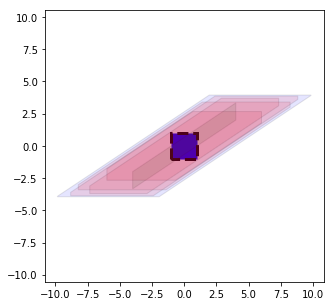

In [10]:
N = 10  # number of steps
K = {}
PreS = precursor(S, A, U, B) #one step controllable to S
for j in range(N):
    K[j]= PreS #for j=0 one ste controllable
    PreS = precursor(K[j], A, U, B)


# Plotting 
plt.clf()
plt.cla()
plt.close('all')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
S.plot(ax, color='b')
K[0].plot(ax, color='g', alpha=0.1, linestyle='solid', linewidth=1, edgecolor=None)      # K_0 is equivalent to Pre S
K[1].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_1 two step controllable set 
K[2].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_2 three step controllable set 
K[3].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_3 
K[4].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_4 
K[N-1].plot(ax, color='b', alpha=0.1, linestyle='solid', linewidth=1)                      # K_5  

plt.rcParams['figure.figsize'] = [10, 10]
ax.autoscale_view()
ax.axis('equal')
plt.show()


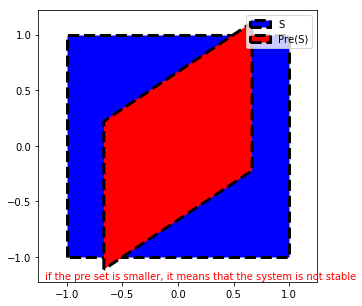

eigen value of A_cl: [ 1.3651 -1.4651]


In [15]:
# Case of autonomus systems
# u=[-0.1, -0.1]*x
K=np.array([[-0.1, -0.1]])
ACl=A+B@K  # state feedback 
S = pt.Polytope(np.array([[1.0, 0], 
                          [0, 1.0],
                          [-1, 0],
                          [0, -1]]), 
                np.array([[1], 
                          [1],
                          [1],
                          [1]]))
# Input constraint 
Hu=np.array([[1.0],[-1.0]])
ku=np.array([[5.0], [5.0]])
# recall U = pt.Polytope(Hu,ku)
# u = Kx -> (Hu*k)u <= ku 
# U now become X constraints
# Snew is the intersection of S and U_new 
U_new = pt.Polytope(Hu@K,ku)
Snew=S.intersect(U_new)
preS = precursor(Snew, A)

fig, ax = plt.subplots()
Snew.plot(ax, color='b')
#preS.intersect(S).plot(ax, color='r')
preS.plot(ax, color='r')
ax.legend(['S', 'Pre(S)'])
plt.rcParams['figure.figsize'] = [5, 5]
ax.autoscale_view()
ax.axis('equal')
plt.text(-1.2,-1.2,'if the pre set is smaller, it means that the system is not stable',color = 'r')
plt.show()

print('eigen value of A_cl:', np.linalg.eigvals(ACl))

## **Control Invariant and Invariant Example**

In [ ]:
def Oinf(Xset, A, Wset=pt.Polytope()):
    '''
    return: Oinf means that if x(t+1) = Ax(t) system, initial point in Oinf,
    it will always stay in Xset 
    Xset: the region got from state constraints 
    A: A matrix of system 
    Note: the state should always be in Xset, so Omegap should always intersect with Xset.
    '''
    
    Omega = Xset
    k = 0
    Omegap = precursor(Omega, A).intersect(Omega)
    while not Omegap == Omega:
        k += 1
        Omega = Omegap
        if not pt.is_empty(Wset):
            Omegap = precursor(Omega, A, Wset=Wset).intersect(Omega)
        else:
            Omegap = precursor(Omega, A).intersect(Omega)
    return Omegap

def Cinf(Xset, A, Uset, B, Wset=pt.Polytope()):
    '''
    same for the Oinf set doc, the only difference between them is B, 
    B was used as input param in precursor 
    '''
    Omega = Xset
    k = 0
    Omegap = precursor(Omega, A, Uset, B).intersect(Omega)
    while not Omegap == Omega:
        k += 1
        Omega = Omegap
        if not pt.is_empty(Wset):
            Omegap = precursor(Omega, A, Uset, B, Wset=Wset).intersect(Omega)
        else:
            Omegap = precursor(Omega, A, Uset, B).intersect(Omega)
    return Omegap

# Maximal & Control positive invariant set
## Example 1: $\mathcal{O}_{\infty}$

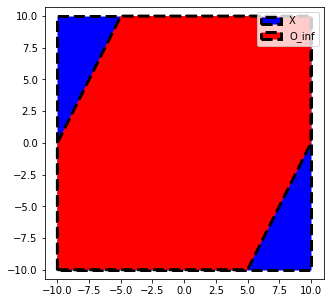

In [ ]:
# Example 10.5 (Figure 10.7) MPC book

A = np.array([[0.5, 0],
              [1.0, -0.5]])

X = pt.Polytope(np.array([[1.0, 0], 
                          [0, 1.0],
                          [-1, 0],
                          [0, -1]]), 
                np.array([[10.0], 
                          [10.0],
                          [10.0],
                          [10.0]]))
Oinfset = Oinf(X, A)
fig, ax = plt.subplots()
X.plot(ax, color='b')
Oinfset.plot(ax, color='r')
ax.legend(['X', 'O_inf'])
ax.autoscale_view()
ax.axis('equal')
plt.show()

## Example 2: $\mathcal{C}_{\infty}$

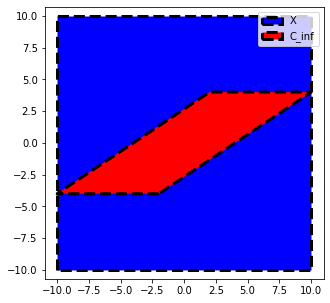

In [ ]:
# Example 10.6 (Figure 10.8) MPC book

A = np.array([[1.5, 0],
              [1.0, -1.5]])

B = np.array([[1.0], 
              [0.0]])
X = pt.Polytope(np.array([[1.0, 0], 
                          [0, 1.0],
                          [-1, 0],
                          [0, -1]]), 
                np.array([[10.0], 
                          [10.0],
                          [10.0],
                          [10.0]]))

U = pt.Polytope(np.array([[1.0], 
                          [-1.0]]),
                np.array([[5.0], 
                          [5.0]]))

Cinfset = Cinf(X, A, U, B)
fig, ax = plt.subplots()
X.plot(ax, color='b')
Cinfset.plot(ax, color='r')
ax.legend(['X', 'C_inf'])
ax.autoscale_view()
ax.axis('equal')
plt.show()